In [50]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

**Merging 12 Months Of Data Into 1 Single File**

In [20]:
##"files" counts the CSV files while "file" stores the CSV files indivuelly   
files = [file for file in os.listdir("C:\Panda_Sales_Project\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data")] 

##pd.DataFrame is used for storing an empty dataframe for later use 
all_months_data=pd.DataFrame()

##Concate all CSV's into one dataframe
for file in files:
    df=pd.read_csv("C:\Panda_Sales_Project\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data/" +file)
    all_months_data=pd.concat([all_months_data,df])

##Delete NaN Files in The Dataframe
all_months_data =all_months_data[all_months_data["Product"].str.contains("NaN")==False]
all_data=all_months_data         


**Additional Data For Columns**

**Delete "Or" In Dates**

In [21]:

all_data=all_data[all_data["Order Date"].str[0:2]!="Or"]
all_data["Month"]=all_data["Order Date"].str[0:2]

##Turns Monts Column Into Integer 32 To Save Space
all_data["Month"]=all_data["Month"].astype("int32")
all_data

C:\Users\watth\AppData\Local\Temp\ipykernel_11836\1581553956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Month"]=all_data["Order Date"].str[0:2]
C:\Users\watth\AppData\Local\Temp\ipykernel_11836\1581553956.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Month"]=all_data["Month"].astype("int32")


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


**Convert Columns To Correct Type**

In [22]:
all_data["Quantity Ordered"]=pd.to_numeric(all_data["Quantity Ordered"])# Make float
all_data["Price Each"]=pd.to_numeric(all_data["Price Each"])# Make float

all_data.head()

C:\Users\watth\AppData\Local\Temp\ipykernel_11836\1662525260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Quantity Ordered"]=pd.to_numeric(all_data["Quantity Ordered"])# Make float
C:\Users\watth\AppData\Local\Temp\ipykernel_11836\1662525260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Price Each"]=pd.to_numeric(all_data["Price Each"])# Make float


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [23]:
##Make Sales Column By Multiplying Quantity Orered and Price Each
all_data["Sales"]=all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

C:\Users\watth\AppData\Local\Temp\ipykernel_11836\3606492234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Sales"]=all_data["Quantity Ordered"] * all_data["Price Each"]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


**Add A City Column**

In [24]:
##Use Apply Method
def get_city(adress):
    return adress.split(",")[1]
def get_state(adress):
    return adress.split(",")[2].split(" ")[1]
all_data["City"]=all_data["Purchase Address"].apply(lambda x: get_city(x)+ " " + get_state(x))

C:\Users\watth\AppData\Local\Temp\ipykernel_11836\3505667906.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["City"]=all_data["Purchase Address"].apply(lambda x: get_city(x)+ " " + get_state(x))


**What is the best month for sales? How much was earned that month**

In [25]:
results=all_data.groupby("Month").sum()
results

C:\Users\watth\AppData\Local\Temp\ipykernel_11836\3547393483.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results=all_data.groupby("Month").sum()


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


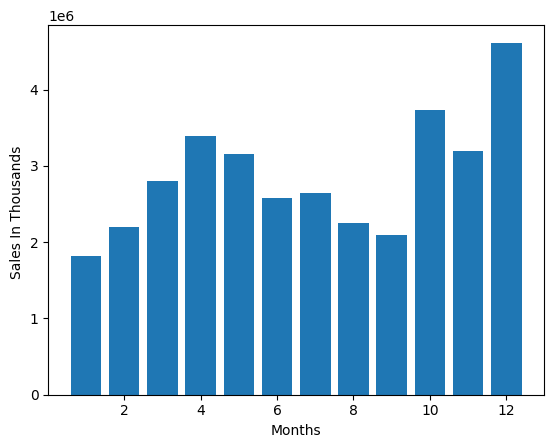

In [26]:
##Create Bar Chart
months=range(1,13)
plt.bar(months,results["Sales"])
plt.xlabel("Months")
plt.ylabel("Sales In Thousands ")
plt.show()


**What City Had The Highest Number Of Sales**

In [27]:
results=all_data.groupby("City").sum()
results

C:\Users\watth\AppData\Local\Temp\ipykernel_11836\1096296902.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results=all_data.groupby("City").sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Portland ME,2750,447189.25,17144,449758.27
Portland OR,11303,1860558.22,70621,1870732.34
San Francisco CA,50239,8211461.74,315520,8262203.91


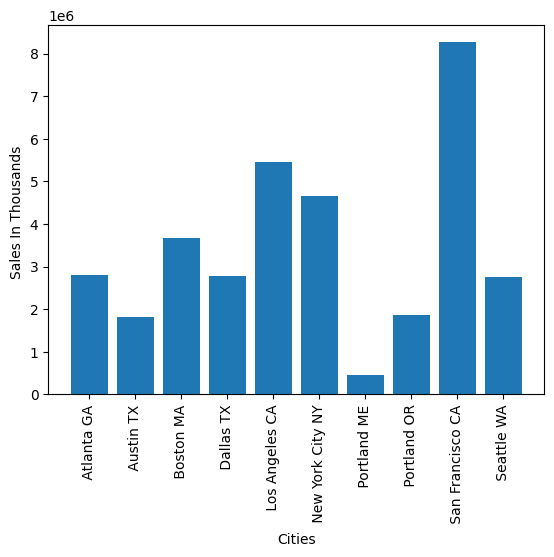

In [28]:
cities=[city for city, df in all_data.groupby("City")]
plt.bar(cities,results["Sales"])
plt.xticks(cities,rotation ="vertical")
plt.xlabel("Cities")
plt.ylabel("Sales In Thousands ")
plt.show()

**Question 3:What time should we display advertiesments to maximize likelihood of customer's buying product?**

In [29]:
#Makes It easier To Determine The Time
all_data["Order Date"]=pd.to_datetime(all_data["Order Date"])

C:\Users\watth\AppData\Local\Temp\ipykernel_11836\425601281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Order Date"]=pd.to_datetime(all_data["Order Date"])


In [30]:
##Making Columns Of The Products Bought In The Exact Hour And Minute
all_data["Hour"]=all_data["Order Date"].dt.hour
all_data["Minute"]=all_data["Order Date"].dt.minute
all_data.head()

C:\Users\watth\AppData\Local\Temp\ipykernel_11836\4290164541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Hour"]=all_data["Order Date"].dt.hour
C:\Users\watth\AppData\Local\Temp\ipykernel_11836\4290164541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Minute"]=all_data["Order Date"].dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


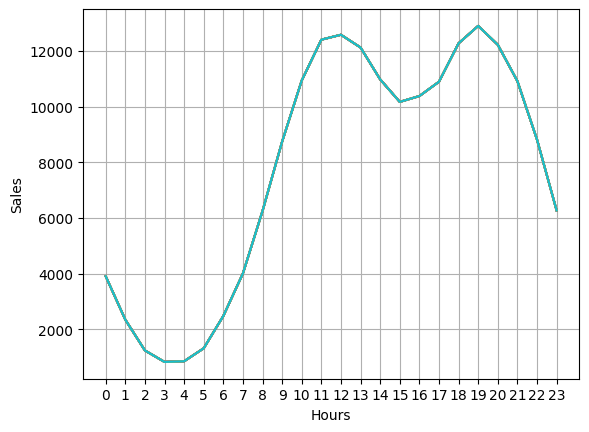

In [39]:
hours=[hour for hour, df in all_data.groupby("Hour")]
plt.plot(hours,all_data.groupby(["Hour"]).count())
plt.ylabel("Sales")
plt.xlabel("Hours")
plt.xticks(hours)
plt.grid()


**What products are most sold together**

In [49]:
df = all_data[all_data["Order ID"].duplicated(keep=False)]
df["Grouped"]=df.groupby("Order ID")["Product"].transform(lambda x:",".join(x))
df=df[["Order ID","Grouped"]].drop_duplicates()
df.head(20)

C:\Users\watth\AppData\Local\Temp\ipykernel_11836\3920603310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"]=df.groupby("Order ID")["Product"].transform(lambda x:",".join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [54]:
count=Counter()
for row in df["Grouped"]:
    row_list=row.split(",")
    count.update(Counter(combinations(row_list,2)))
    
for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


**Question 5: What product was sold the most? Why do you think it sold the most?**

C:\Users\watth\AppData\Local\Temp\ipykernel_11836\3457210753.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered=product_group.sum()["Quantity Ordered"]


([<matplotlib.axis.XTick at 0x17b6f3d2d50>,
 [Text(0.0, 0, '20in Monitor'),
  Text(1.0, 0, '27in 4K Gaming Monitor'),
  Text(2.0, 0, '27in FHD Monitor'),
  Text(3.0, 0, '34in Ultrawide Monitor'),
  Text(4.0, 0, 'AA Batteries (4-pack)'),
  Text(5.0, 0, 'AAA Batteries (4-pack)'),
  Text(6.0, 0, 'Apple Airpods Headphones'),
  Text(7.0, 0, 'Bose SoundSport Headphones'),
  Text(8.0, 0, 'Flatscreen TV'),
  Text(9.0, 0, 'Google Phone'),
  Text(10.0, 0, 'LG Dryer'),
  Text(11.0, 0, 'LG Washing Machine'),
  Text(12.0, 0, 'Lightning Charging Cable'),
  Text(13.0, 0, 'Macbook Pro Laptop'),
  Text(14.0, 0, 'ThinkPad Laptop'),
  Text(15.0, 0, 'USB-C Charging Cable'),
  Text(16.0, 0, 'Vareebadd Phone'),
  Text(17.0, 0, 'Wired Headphones'),
  Text(18.0, 0, 'iPhone')])

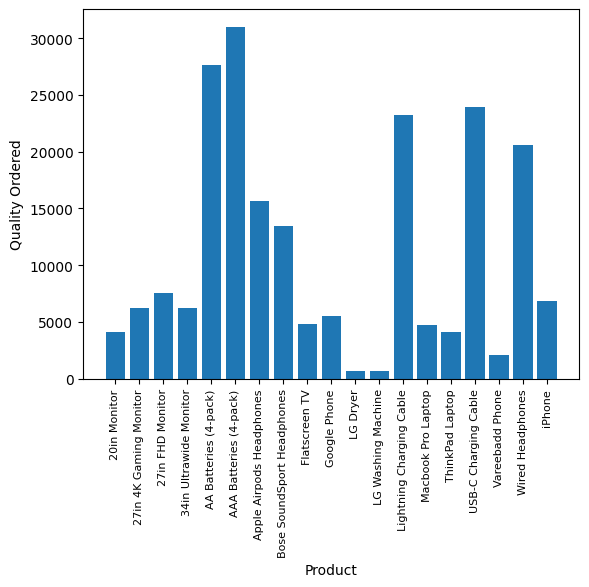

In [68]:
product_group=all_data.groupby("Product")
quantity_ordered=product_group.sum()["Quantity Ordered"]
products=[product for product, df in product_group]

plt.bar(products,quantity_ordered)
plt.ylabel("Quality Ordered")
plt.xlabel("Product")
plt.xticks(products,rotation="vertical",size=8)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


C:\Users\watth\AppData\Local\Temp\ipykernel_11836\915768656.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices=all_data.groupby("Product").mean()["Price Each"]
C:\Users\watth\AppData\Local\Temp\ipykernel_11836\915768656.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation="vertical",size=8)


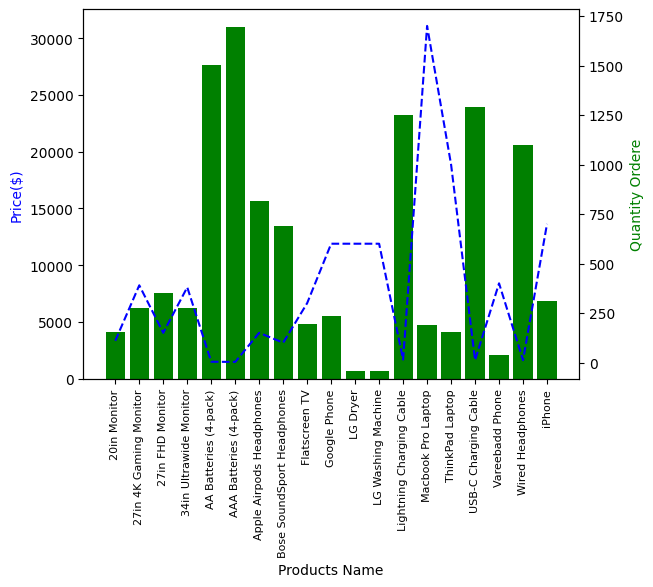

In [80]:
prices=all_data.groupby("Product").mean()["Price Each"]
print(prices)

fig,ax1=plt.subplots()

ax2=ax1.twinx()
ax1.bar(products,quantity_ordered,color="green")
ax2.plot(products,prices,"b--")

ax1.set_xlabel("Products Name")
ax1.set_ylabel("Price($)",color="b")
ax2.set_ylabel("Quantity Ordere",color="g")
ax1.set_xticklabels(products,rotation="vertical",size=8)

plt.show()